In [1]:
import json
import networkx as nx
import pickle
import gzip
import os
import scipy as sp
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### reading the netmf results

In [2]:
address_netmf = '/home/parham/gdrive/rt_Parham/deep_geolocation/netmf_results/results' ## to be changed so it is reproducible

In [3]:
file_names = glob(address_netmf + '/*.txt')
results = []
for file in file_names:
    results.append(pd.read_csv(file))
results = pd.concat(results)
results.drop(['Unnamed: 0'], axis = 1, inplace=True)
results.sort_values('fraction',inplace=True)
results.reset_index(drop=True,inplace=True)


In [4]:
## seeing the difference between d2v=0 and d2v =1


In [5]:
g = results[results.d2v==1].groupby(['windownetmf', 'negative', 'dim_embedding','d2v'])

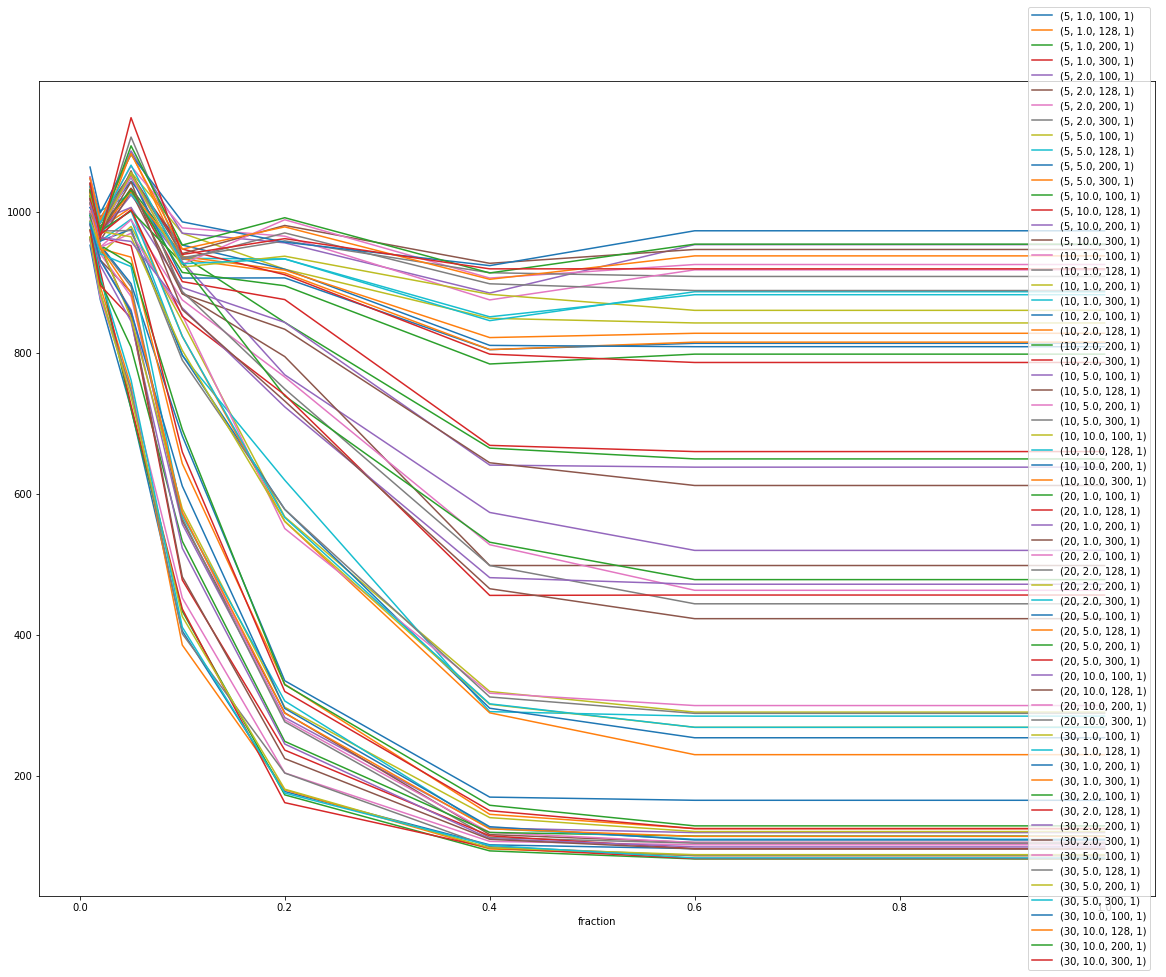

In [6]:
fig, ax = plt.subplots()
for key, grp in g:
    ax = grp.plot(ax=ax, x='fraction', y='median', label=key, figsize = (20,15))

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

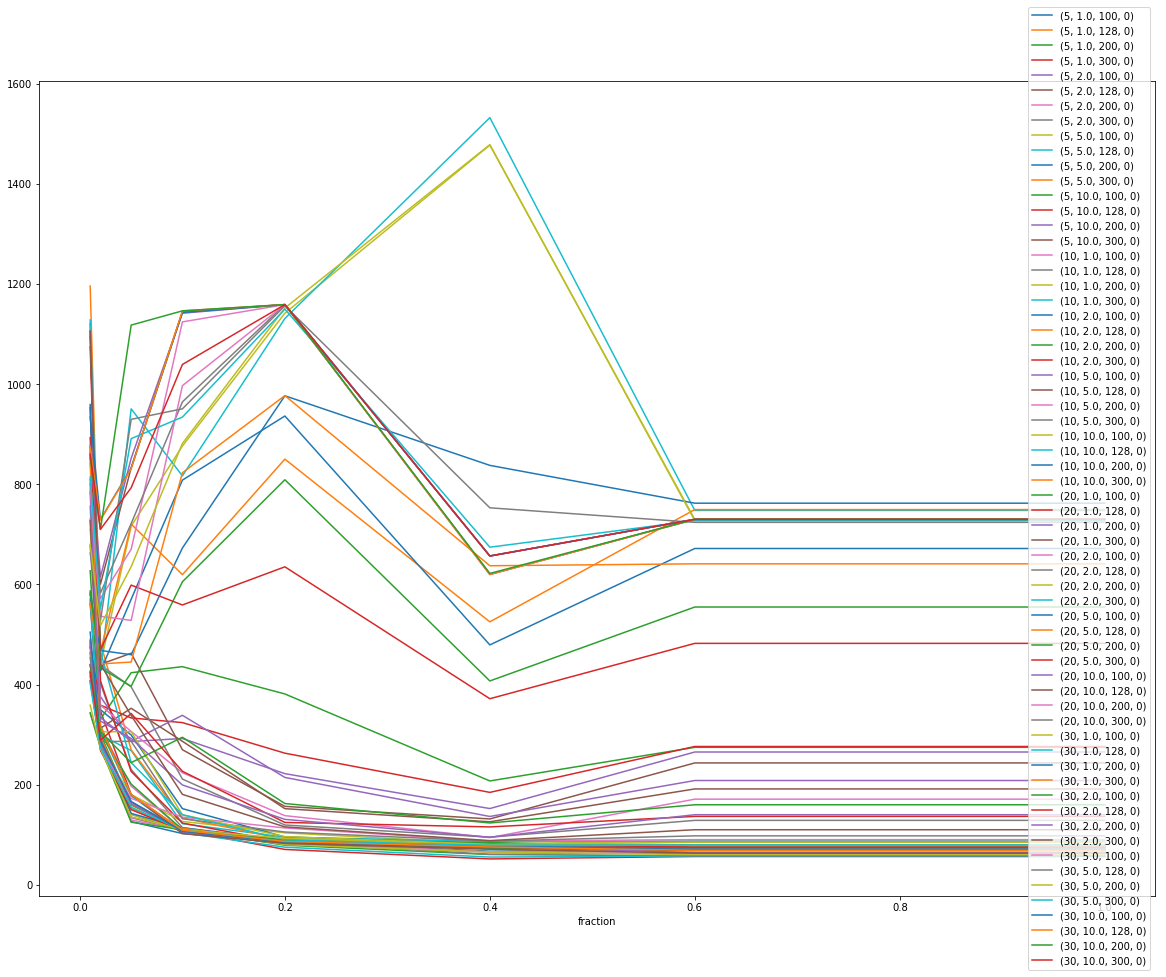

In [7]:
g = results[results.d2v==0].groupby(['windownetmf', 'negative', 'dim_embedding','d2v'])
fig, ax = plt.subplots()
for key, grp in g:
    ax = grp.plot(ax=ax, x='fraction', y='median', label=key, figsize = (20,15))

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

### TFIDF provides better results, the reason can be sampling in the doc2vec procedure, which corresponds to losing information.

## now we set the negative size

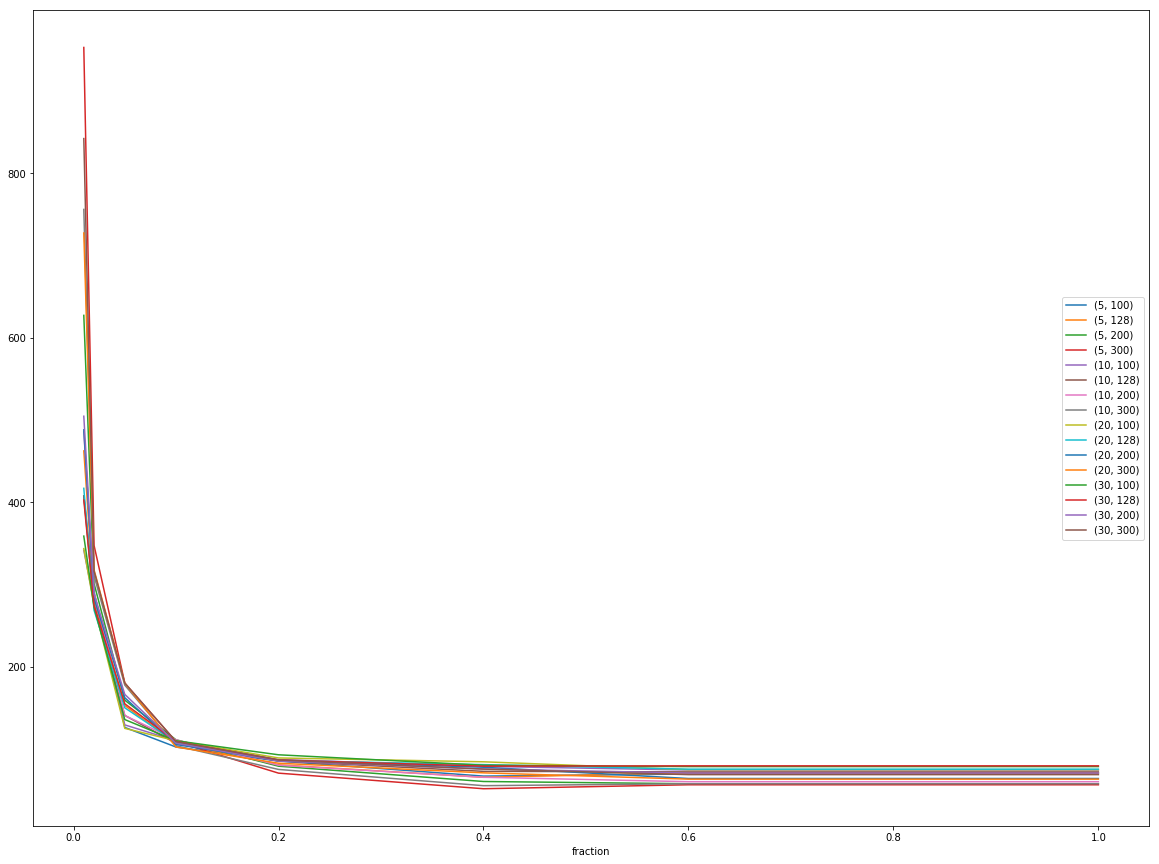

In [8]:
# negative 1 2 5 10
g = results[(results.negative==1) & (results.d2v == 0)].groupby(['windownetmf', 'dim_embedding'])
fig, ax = plt.subplots()
for key, grp in g:
    ax = grp.plot(ax=ax, x='fraction', y='median', label=key, figsize = (20,15))

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

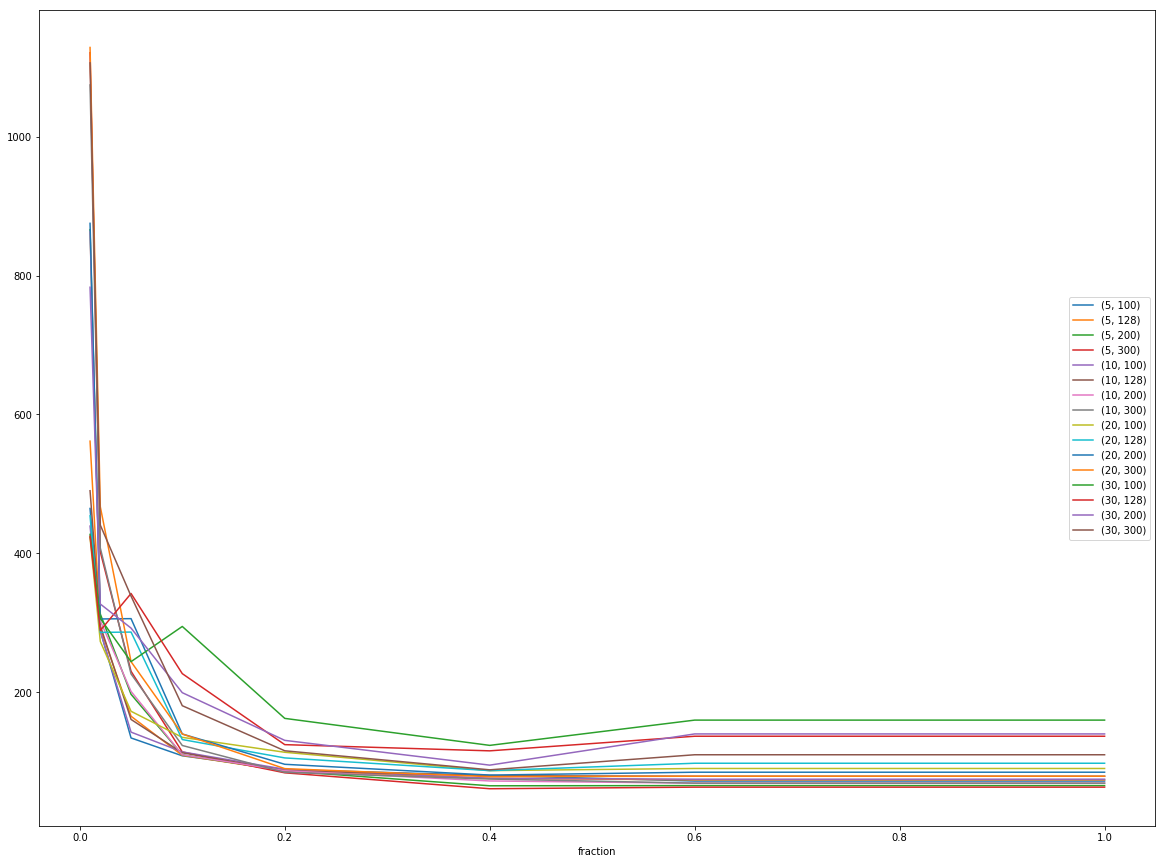

In [9]:
# negative 1 2 5 10
g = results[(results.negative==2) & (results.d2v == 0)].groupby(['windownetmf', 'dim_embedding'])
fig, ax = plt.subplots()
for key, grp in g:
    ax = grp.plot(ax=ax, x='fraction', y='median', label=key, figsize = (20,15))

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

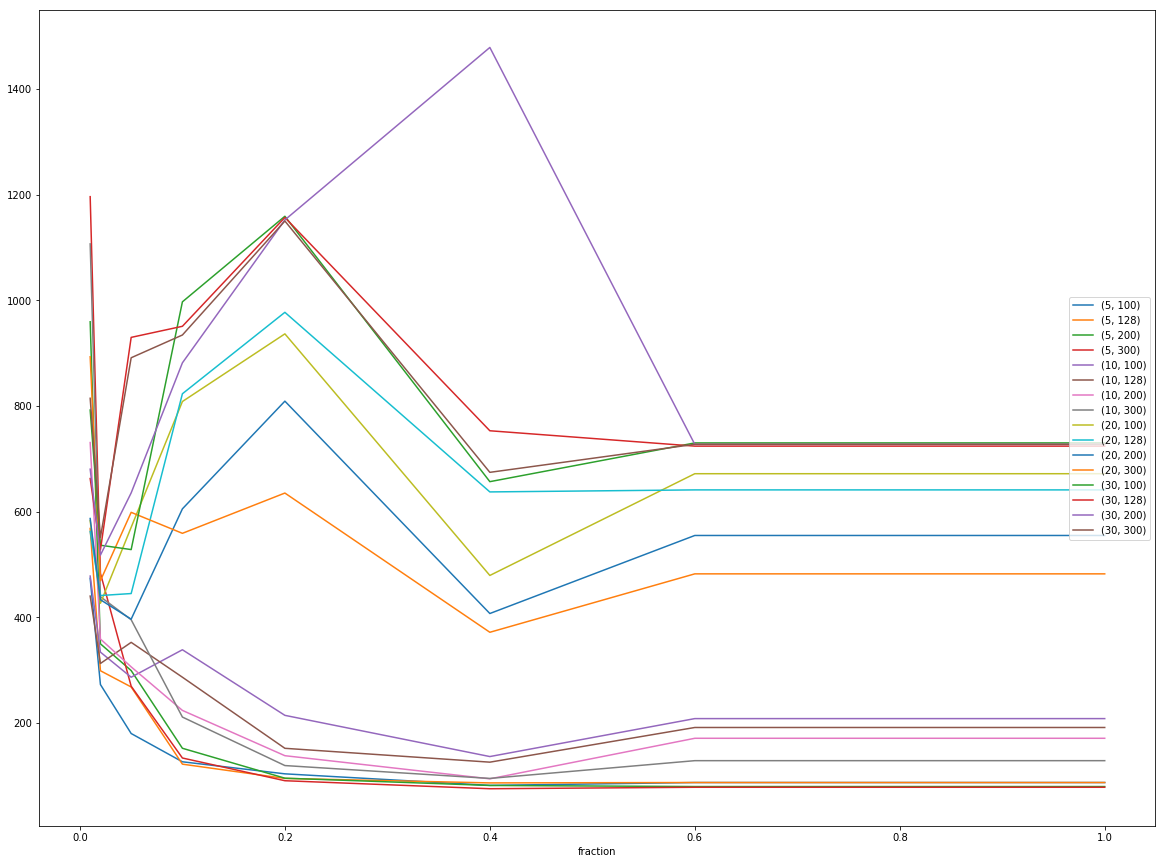

In [10]:
# negative 1 2 5 10
g = results[(results.negative==5) & (results.d2v == 0)].groupby(['windownetmf', 'dim_embedding'])
fig, ax = plt.subplots()
for key, grp in g:
    ax = grp.plot(ax=ax, x='fraction', y='median', label=key, figsize = (20,15))

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

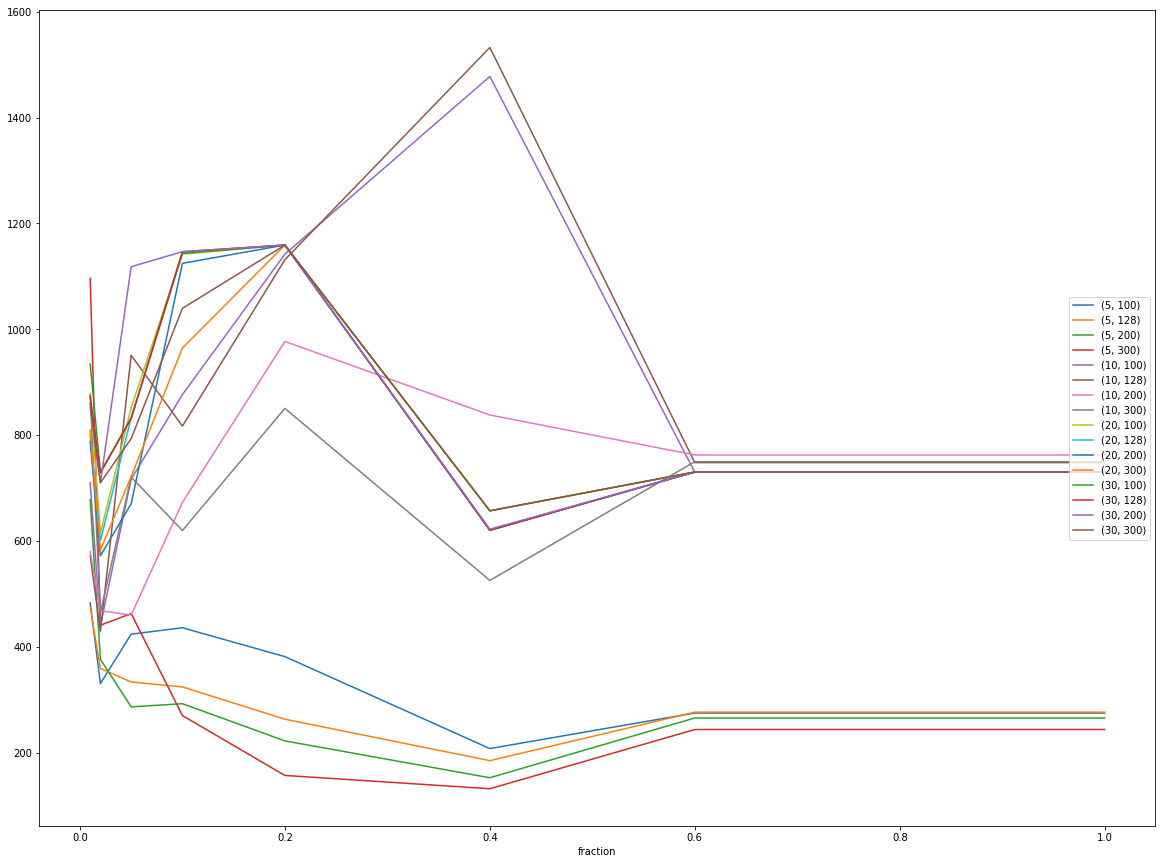

In [11]:
# negative 1 2 5 10
g = results[(results.negative==10) & (results.d2v == 0)].groupby(['windownetmf', 'dim_embedding'])
fig, ax = plt.subplots()
for key, grp in g:
    ax = grp.plot(ax=ax, x='fraction', y='median', label=key, figsize = (20,15))

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

### As can be seen, the negative sampling causes inconsistency in the results and adds a lot of variance (?) to the dataset, so we set the negative sampling to 1

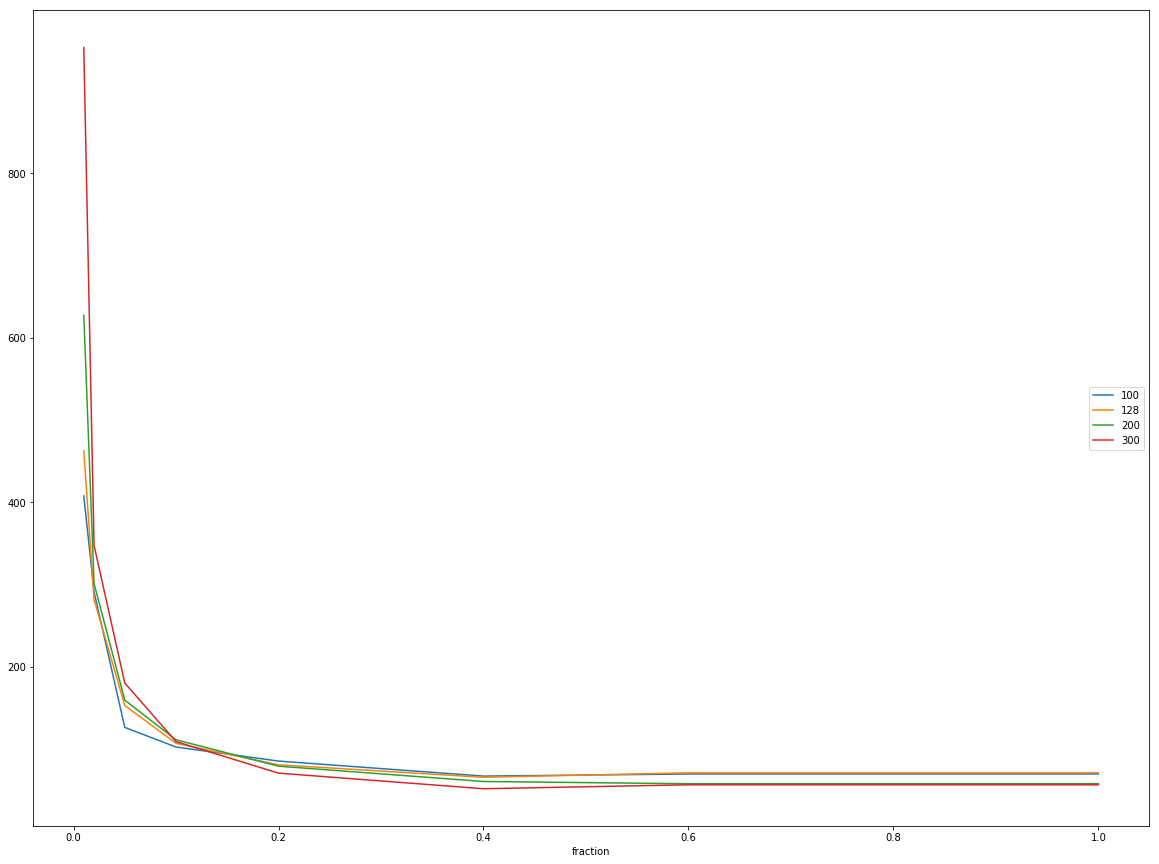

In [12]:
#  widowsize 5 10 20 30
g = results[(results.negative==1) & (results.d2v == 0) & (results.windownetmf == 5)].groupby(['dim_embedding'])
fig, ax = plt.subplots()
for key, grp in g:
    ax = grp.plot(ax=ax, x='fraction', y='median', label=key, figsize = (20,15))

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

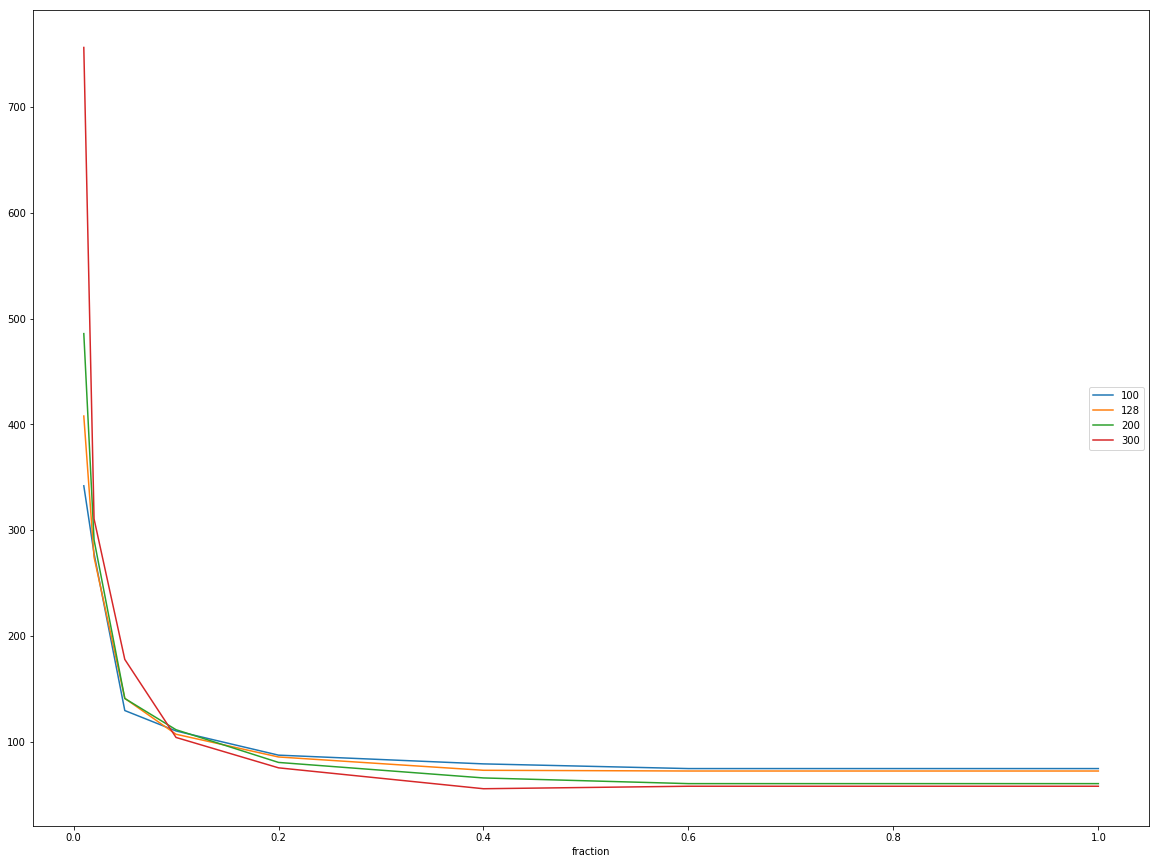

In [13]:
#  widowsize 5 10 20 30
g = results[(results.negative==1) & (results.d2v == 0) & (results.windownetmf == 10)].groupby(['dim_embedding'])
fig, ax = plt.subplots()
for key, grp in g:
    ax = grp.plot(ax=ax, x='fraction', y='median', label=key, figsize = (20,15))

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

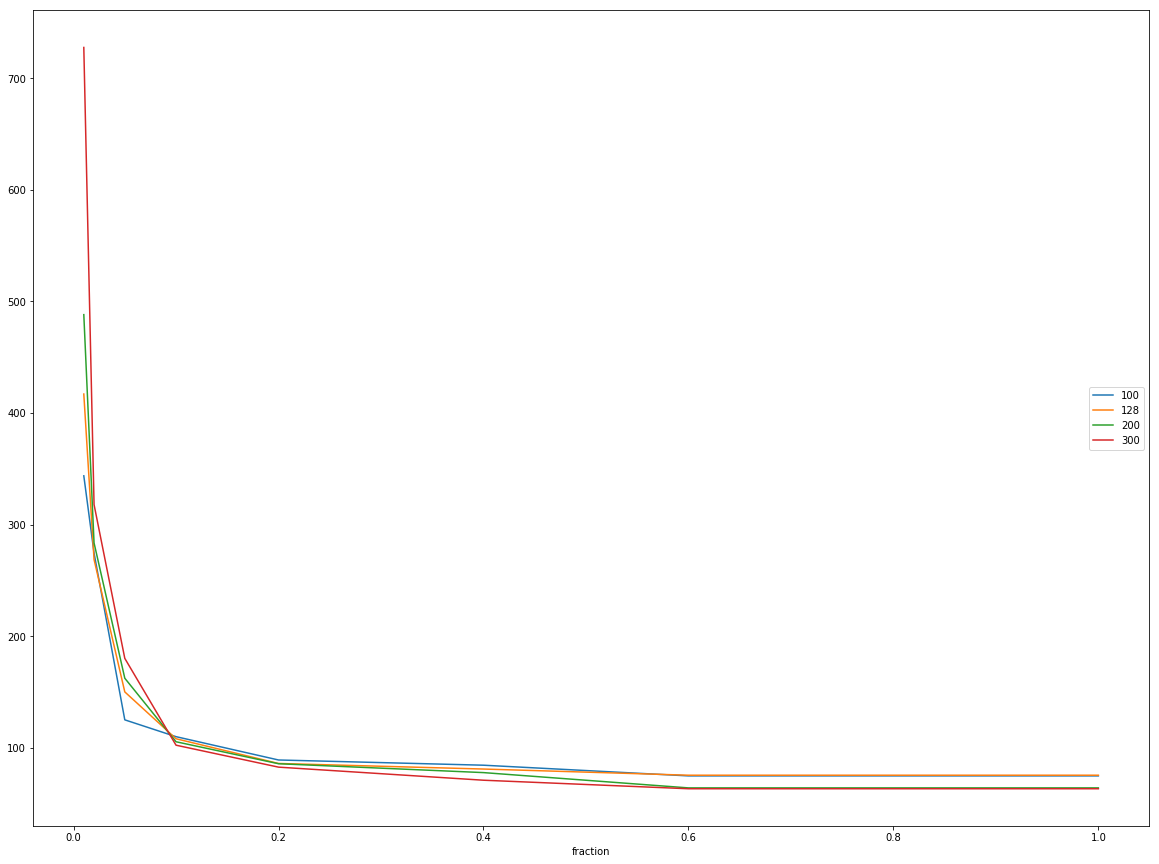

In [14]:
#  widowsize 5 10 20 30
g = results[(results.negative==1) & (results.d2v == 0) & (results.windownetmf == 20)].groupby(['dim_embedding'])
fig, ax = plt.subplots()
for key, grp in g:
    ax = grp.plot(ax=ax, x='fraction', y='median', label=key, figsize = (20,15))

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

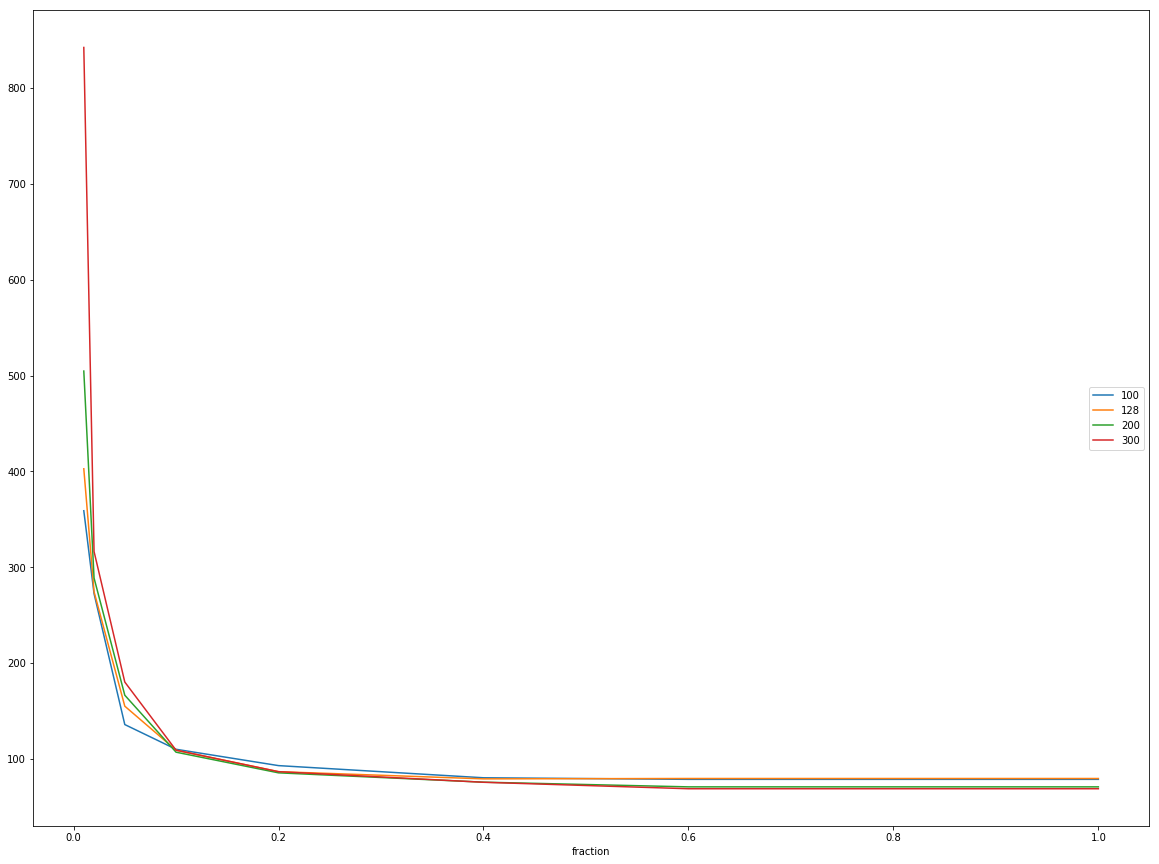

In [15]:
#  widowsize 5 10 20 30
g = results[(results.negative==1) & (results.d2v == 0) & (results.windownetmf == 30)].groupby(['dim_embedding'])
fig, ax = plt.subplots()
for key, grp in g:
    ax = grp.plot(ax=ax, x='fraction', y='median', label=key, figsize = (20,15))

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

### dim_embedding has negative impact on accuracy, as the embedding size increases, the accuracy decreases

maybe its due to the same size of neural network, that captures the embedding poorly

### Window size complex impact, as the window size is too low, the accuracy is not good. Additionally, when the window size is too high, the accuracy decreases as well. It depends on the window size, the best option is:

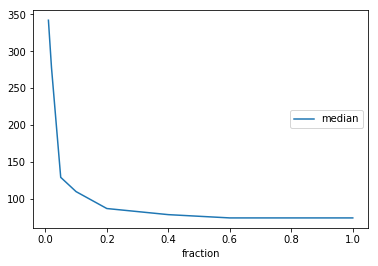

In [16]:
#  widowsize 5 10 20 30
g = results[(results.negative==1) & (results.d2v == 0) & (results.windownetmf == 10) & (results.dim_embedding== 100)]

g.plot(x = 'fraction', y = 'median')

plt.legend(loc='right')
plt.show()
# g.plot(x = 'fraction', y = 'median')

In [17]:
g

,dataset,model_name,mean,median,acc,score,fraction,d2v,window_size,d2vdm,windownetmf,negative,dim_embedding,processing
78,cmu,Neural Net,876.851437,341.843372,42.269129,0.062269,0.01,0,2,1,10,1.0,100,netmf
192,cmu,Neural Net,809.979700,277.808361,45.488127,0.080739,0.02,0,2,1,10,1.0,100,netmf
355,cmu,Neural Net,684.414742,129.377317,51.820580,0.103430,0.05,0,2,1,10,1.0,100,netmf
491,cmu,Neural Net,672.096628,110.067769,53.562005,0.148813,0.10,0,2,1,10,1.0,100,netmf
548,cmu,Neural Net,628.748211,87.203756,56.569921,0.149868,0.20,0,2,1,10,1.0,100,netmf
713,cmu,Neural Net,599.127755,78.945549,57.467018,0.177836,0.40,0,2,1,10,1.0,100,netmf
852,cmu,Neural Net,609.666279,74.513767,57.572559,0.178364,0.60,0,2,1,10,1.0,100,netmf
913,cmu,Neural Net,609.666279,74.513767,57.572559,0.178364,1.00,0,2,1,10,1.0,100,netmf


## the best results that we obtained is far better than the state of the art 341.843372 compared to 600!
## the difference between the full dataset with the state - of- the -art can be justified by sampling reason